<a href="https://colab.research.google.com/github/drugescu/face-recognition/blob/master/MobileNetSSD_v1_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Preparation

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
# If not manually mounted, uncomment these and run
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!ls

adc.json  drive  sample_data


In [0]:
#!ls "/content/drive/My Drive/Datasets/MS-Celeb-1M"

15_id.tfrecords


In [2]:
from __future__ import print_function

import collections
import io
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython import display
from sklearn import metrics

train_path = "/content/drive/My Drive/Datasets/MS-Celeb-1M/15_id.tfrecords"
print(train_path)

/content/drive/My Drive/Datasets/MS-Celeb-1M/15_id.tfrecords


In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.1.0
Eager execution: True


In [0]:
#!cp "/content/drive/My Drive/Datasets/MS-Celeb-1M/15_id.tfrecords" "15_id.tfrecord"

In [0]:
!ls

drive  sample_data


In [0]:
#for image_features in parsed_image_dataset:
#  image_raw = image_features['image_raw'].numpy()
#  display.display(display.Image(data=image_raw))

In [0]:
# Older function that served as model
def _parse_function(record):
  """Extracts features and labels.
  
  Args:
    record: File path to a TFRecord file    
  Returns:
    A `tuple` `(labels, features)`:
      features: A dict of tensors representing the features
      labels: A tensor with the corresponding labels.
  """
  features = {
    "terms": tf.io.FixedLenFeature(dtype=tf.string), # terms are strings of varying lengths
    "labels": tf.io.FixedLenFeature(shape=[1], dtype=tf.float32) # labels are 0 or 1
  }
  
  parsed_features = tf.io.parse_single_example(record, features)
  
  terms = parsed_features['terms'].values
  labels = parsed_features['labels']

  return  {'terms':terms}, labels

In [0]:
# Actual parsing function
def parse(example_proto):
    
    features = { 
        'image_raw': tf.io.FixedLenFeature([], tf.string), 
        'label': tf.io.FixedLenFeature([], tf.int64) 
    }

    features = tf.io.parse_single_example(example_proto, features)

    img = tf.image.decode_jpeg(features['image_raw'])

    # Load image, decode jpeg, cast to float 32 and normalize
    img = tf.cast(img, dtype = tf.float32) * (1. / 255)
    
    # Cast label as uint8
    label = tf.cast(features['label'], tf.uint8) # was tf.int64

    return img, label

# Training Data

In [5]:
print("Dataset size:", sum(1 for _ in tf.data.TFRecordDataset(train_path)))

Dataset size: 1218


In [6]:
# Create the Dataset object.
ds = tf.data.TFRecordDataset(train_path)
print("Dataset after loading from file   :", ds)

# Map features and labels with the parse function.
ds = ds.map(parse)
print("Dataset after conversion and norm.:", ds)

# Shuffle dataset
ds = ds.shuffle(buffer_size = 5000)
print("Dataset after shuffling           :", ds)

# Create train and validation datasets
num_validation = 200
all_recs = ds.take(-1)
validation = ds.take(num_validation).batch(32)#.repeat()
train = ds.skip(num_validation).batch(32)#.repeat()

# Batch
ds = ds.batch(batch_size = 32)
print("Dataset after batching            :", ds)

Dataset after loading from file   : <TFRecordDatasetV2 shapes: (), types: tf.string>
Dataset after conversion and norm.: <MapDataset shapes: ((None, None, None), ()), types: (tf.float32, tf.uint8)>
Dataset after shuffling           : <ShuffleDataset shapes: ((None, None, None), ()), types: (tf.float32, tf.uint8)>
Dataset after batching            : <BatchDataset shapes: ((None, None, None, None), (None,)), types: (tf.float32, tf.uint8)>


In [0]:
# Normalize data
def normalize(image, label):
  """Convert `image` from [0, 255] -> [-0.5, 0.5] floats."""
  image = tf.cast(image, tf.float32) * (1. / 255)# - 0.5
  #image = image.numpy()
  return image, label

#ds = ds.map(normalize) # No longer required - did this step in the parse function
#print(ds)

<MapDataset shapes: ((None, None, None), ()), types: (tf.float32, tf.uint8)>


Current batch size : 32
Image shape : (112, 112, 3) , category  2


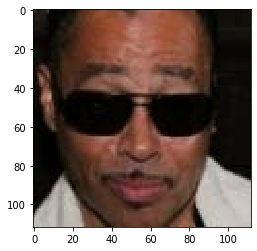

Current batch size : 32
Image shape : (112, 112, 3) , category  13


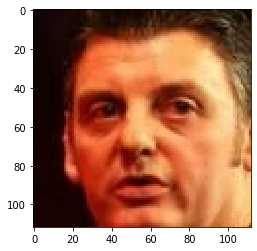

Current batch size : 32
Image shape : (112, 112, 3) , category  1


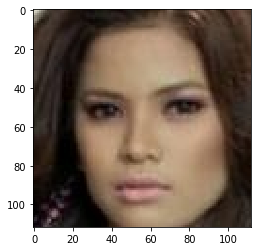

Current batch size : 32
Image shape : (112, 112, 3) , category  14


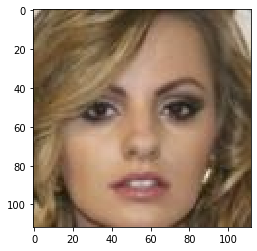

Current batch size : 32
Image shape : (112, 112, 3) , category  14


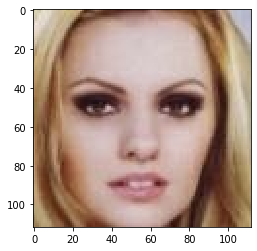

Current batch size : 32
Image shape : (112, 112, 3) , category  13


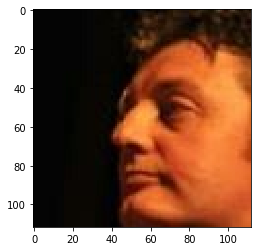

Current batch size : 32
Image shape : (112, 112, 3) , category  7


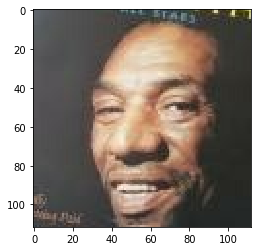

Current batch size : 32
Image shape : (112, 112, 3) , category  8


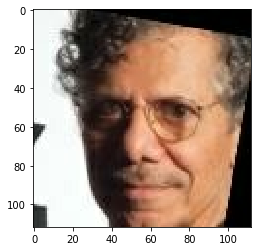

Current batch size : 32
Image shape : (112, 112, 3) , category  2


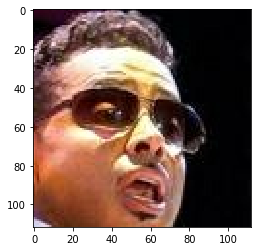

Current batch size : 32
Image shape : (112, 112, 3) , category  10


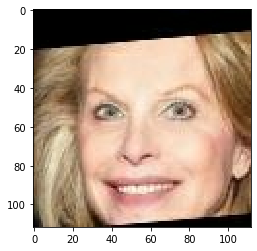

Current batch size : 32
Image shape : (112, 112, 3) , category  11


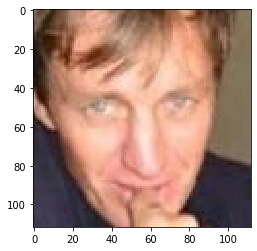

Current batch size : 32
Image shape : (112, 112, 3) , category  4


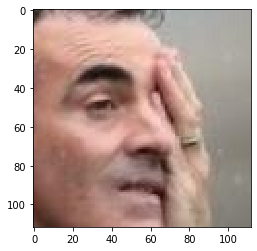

Current batch size : 32
Image shape : (112, 112, 3) , category  5


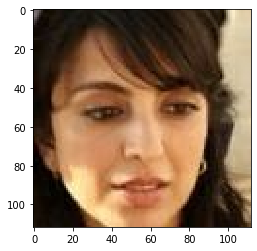

Current batch size : 32
Image shape : (112, 112, 3) , category  7


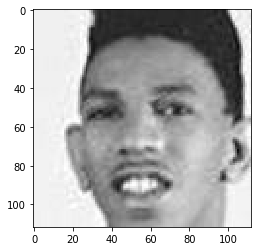

Current batch size : 32
Image shape : (112, 112, 3) , category  8


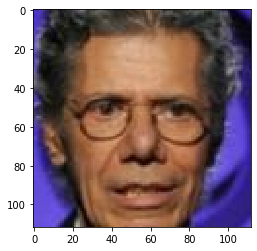

Image shape : (112, 112, 3) , category  11


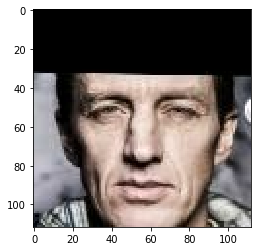

Current batch size : 32
Image shape : (112, 112, 3) , category  10


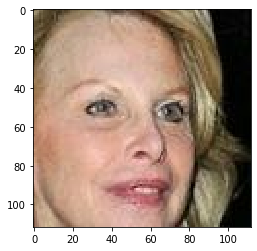

Current batch size : 32
Image shape : (112, 112, 3) , category  14


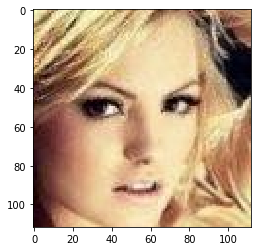

Current batch size : 32
Image shape : (112, 112, 3) , category  14


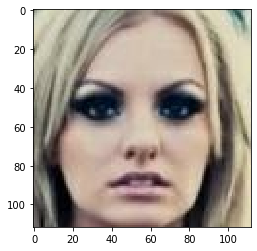

Current batch size : 32
Image shape : (112, 112, 3) , category  9


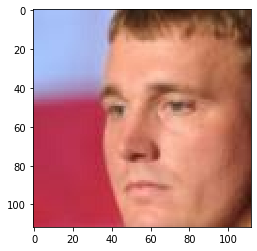

Current batch size : 32
Image shape : (112, 112, 3) , category  2


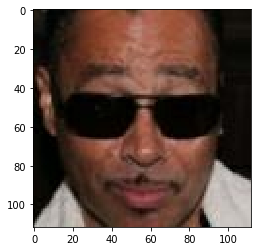

Current batch size : 32
Image shape : (112, 112, 3) , category  8


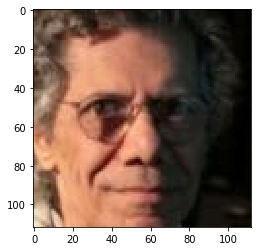

Current batch size : 32
Image shape : (112, 112, 3) , category  2


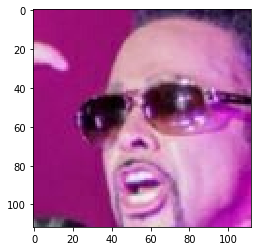

Current batch size : 32
Image shape : (112, 112, 3) , category  5


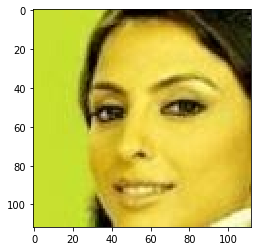

Current batch size : 32
Image shape : (112, 112, 3) , category  13


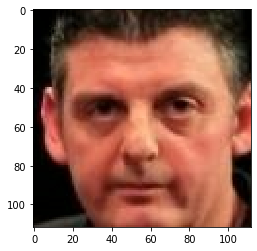

Current batch size : 32
Image shape : (112, 112, 3) , category  1


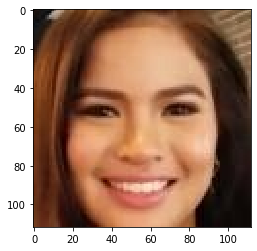

Current batch size : 32
Image shape : (112, 112, 3) , category  13


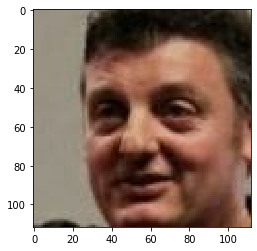

Current batch size : 32
Image shape : (112, 112, 3) , category  10


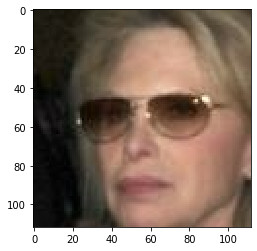

Current batch size : 32
Image shape : (112, 112, 3) , category  7


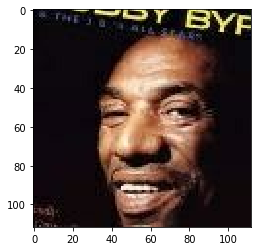

Current batch size : 32
Image shape : (112, 112, 3) , category  13


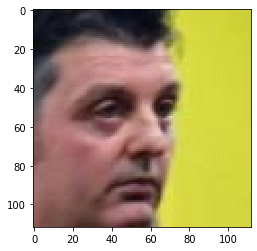

Current batch size : 32
Image shape : (112, 112, 3) , category  6


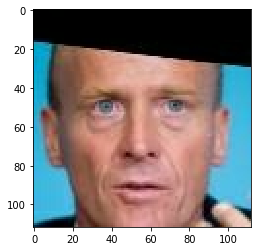

Image shape : (112, 112, 3) , category  4


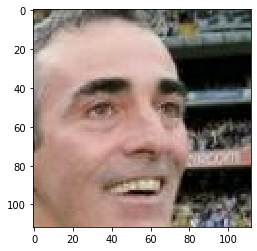

Current batch size : 32
Image shape : (112, 112, 3) , category  1


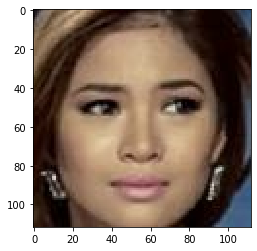

Current batch size : 32
Image shape : (112, 112, 3) , category  3


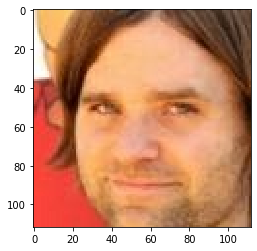

Current batch size : 32
Image shape : (112, 112, 3) , category  9


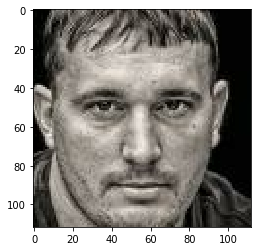

Current batch size : 32
Image shape : (112, 112, 3) , category  5


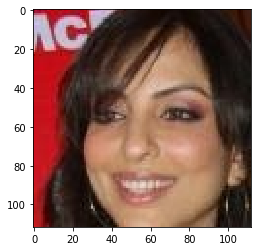

Current batch size : 32
Image shape : (112, 112, 3) , category  10


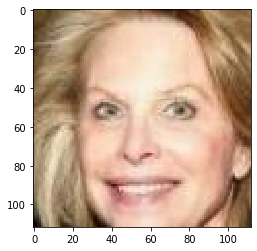

Current batch size : 32
Image shape : (112, 112, 3) , category  14


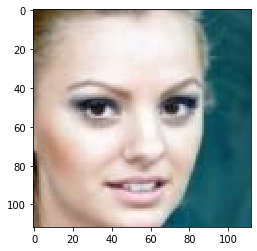

Current batch size : 32
Image shape : (112, 112, 3) , category  3


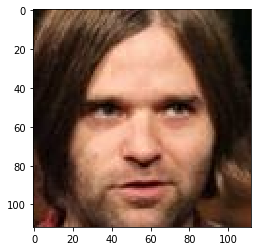

Current batch size : 32
Image shape : (112, 112, 3) , category  10


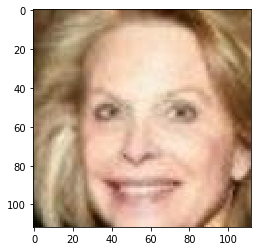

Current batch size : 2


In [7]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

i = 0

# Show the tensor format
#it = iter(ds)
#print("Dataset tensor format example:", next(it))

# Iterate through the images and print them
for img in ds:
  current_batch_size = img[0].shape[0]
  print("Current batch size :", current_batch_size)
  
  for b in range(current_batch_size):
    i = i + 1
    if i % 30 == 0 and img[0][b] != None:
      print("Image shape :", img[0][b].shape, ", category ", img[1][b].numpy())
      plt.imshow(img[0][b].numpy())
      plt.show()

Now, we create two vectors to store the training and validation data.

In [0]:
#all_recs = ds.take(-1)

#num_validation = 200
#validation = ds.take(num_validation)
#train = ds.skip(num_validation)

In [8]:
print(ds)

<BatchDataset shapes: ((None, None, None, None), (None,)), types: (tf.float32, tf.uint8)>


In [0]:
print(all_recs)

<TakeDataset shapes: ((None, None, None), ()), types: (tf.float32, tf.uint8)>


In [0]:
print(validation)

<RepeatDataset shapes: ((None, None, None, None), (None,)), types: (tf.float32, tf.uint8)>


In [0]:
print(train.element_spec)

(TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))


In [0]:
print(validation.element_spec)

(TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))


In [9]:
dsit = ds.as_numpy_iterator()
print(dsit)
print(dsit.next)
print(next(dsit))

<bound method _NumpyIterator.next of <tensorflow.python.data.ops.dataset_ops._NumpyIterator object at 0x7f143ab35518>>
(array([[[[0.25882354, 0.22352943, 0.18823531],
         [0.29411766, 0.25882354, 0.22352943],
         [0.35686275, 0.31764707, 0.2784314 ],
         ...,
         [0.49803925, 0.34901962, 0.27450982],
         [0.5176471 , 0.34901962, 0.28235295],
         [0.49803925, 0.32941177, 0.2627451 ]],

        [[0.2392157 , 0.20392159, 0.16862746],
         [0.27058825, 0.23529413, 0.20000002],
         [0.3254902 , 0.28627452, 0.2509804 ],
         ...,
         [0.42352945, 0.27450982, 0.20000002],
         [0.4431373 , 0.28235295, 0.21176472],
         [0.43921572, 0.2784314 , 0.20784315]],

        [[0.21960786, 0.1764706 , 0.15294118],
         [0.24313727, 0.20392159, 0.16862746],
         [0.28627452, 0.23529413, 0.20392159],
         ...,
         [0.3372549 , 0.20000002, 0.1254902 ],
         [0.3529412 , 0.20784315, 0.13725491],
         [0.36862746, 0.21568629, 0

# Export to .h5py file

In [0]:
import h5py

In [0]:
output_features = []
output_labels   = []

for v in all_recs:
  output_features.append(v[0].numpy())
  output_labels.append(np.asarray(v[1], dtype = np.uint8))

#output_features = tf.make_ndarray(all_recs)
output_features = np.asarray(output_features)
output_labels = np.asarray(output_labels)

#output_features.reshape(-1, 112, 112, 3)
print(output_features.shape)
print(output_labels.shape)

(1218, 112, 112, 3)
(1218,)


In [0]:
print(len(output_features))
print(output_features[0])
print(output_labels[0])

1218
[[[0.5058824  0.46274513 0.3921569 ]
  [0.49803925 0.454902   0.38431376]
  [0.4901961  0.44705886 0.37647063]
  ...
  [0.227451   0.20392159 0.14117648]
  [0.21568629 0.19215688 0.13725491]
  [0.19607845 0.18431373 0.1254902 ]]

 [[0.49411768 0.45098042 0.3803922 ]
  [0.4901961  0.44705886 0.37647063]
  [0.4784314  0.43529415 0.3647059 ]
  ...
  [0.23137257 0.20392159 0.14117648]
  [0.18823531 0.16470589 0.10980393]
  [0.15294118 0.14117648 0.08235294]]

 [[0.48235297 0.43921572 0.36862746]
  [0.47450984 0.43137258 0.36078432]
  [0.4666667  0.42352945 0.3529412 ]
  ...
  [0.2509804  0.22352943 0.16078432]
  [0.2392157  0.21568629 0.16078432]
  [0.23137257 0.20784315 0.15294118]]

 ...

 [[0.19607845 0.15686275 0.05882353]
  [0.19607845 0.15686275 0.05882353]
  [0.19607845 0.15686275 0.05882353]
  ...
  [0.6745098  0.47058827 0.38431376]
  [0.6666667  0.46274513 0.37647063]
  [0.65882355 0.454902   0.36862746]]

 [[0.19215688 0.15294118 0.05490196]
  [0.19215688 0.15294118 0.05490

In [0]:
#n = ds.make_one_shot_iterator().get_next()

In [0]:
h5f.close()

In [0]:
dt = h5py.special_dtype(vlen=str)

#with h5py.File("test_data.h5",  "a") as f:
#    del f
#h5f.close()

h5f = h5py.File('test_data.h5', 'w')
#h5f.create_dataset('output_features', data = output_features, dtype=dt)
#h5f.create_dataset('output_labels', data = output_labels)
h5f.close()

In [0]:
!ls

drive  sample_data  test_data.h5  train_data.h5


# Model

In [21]:
# Get MobileNet v1
#model = tf.keras.applications.MobileNet(weights='imagenet', input_tensor=tf.keras.layers.Input(shape = (112,112,3)))
#model = tf.keras.applications.MobileNet(input_tensor=tf.keras.layers.Input(shape = (112,112,3)), weights=None, classes=15, include_top=True)

# Alternatively
# Load full model including weights if we wish to continue from before, instead of starting from scratch
model = tf.keras.models.load_model('/content/drive/My Drive/Datasets/MS-Celeb-1M/15id_model.h5')
#model.load_weights('15id_model_weights.h5', by_name=True)

# Print summary
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 112, 112, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 113, 113, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 56, 56, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 56, 56, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 56, 56, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 56, 56, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 56, 56, 32) 

In [0]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [0]:
# Try training with tensor -> all_recs = ds.take(-1)
# This trains with unique tensor for all samples, no training or validation
num_epochs = 15

history = model.fit(x = all_recs, verbose = 1, use_multiprocessing = True, epochs = num_epochs)

Epoch 1/15
39/39 [==============================] - 4s 97ms/step - loss: 0.2415 - acc: 0.9236
Epoch 2/15
39/39 [==============================] - 4s 95ms/step - loss: 0.1785 - acc: 0.9466
Epoch 3/15
39/39 [==============================] - 4s 95ms/step - loss: 0.2842 - acc: 0.9557
Epoch 4/15
39/39 [==============================] - 4s 95ms/step - loss: 0.2830 - acc: 0.9294
Epoch 5/15
39/39 [==============================] - 4s 94ms/step - loss: 0.2857 - acc: 0.9179
Epoch 6/15
39/39 [==============================] - 4s 94ms/step - loss: 0.1645 - acc: 0.9507
Epoch 7/15
39/39 [==============================] - 4s 94ms/step - loss: 0.1596 - acc: 0.9655
Epoch 8/15
39/39 [==============================] - 4s 94ms/step - loss: 0.3291 - acc: 0.9458
Epoch 9/15
39/39 [==============================] - 4s 93ms/step - loss: 0.4387 - acc: 0.8982
Epoch 10/15
39/39 [==============================] - 4s 94ms/step - loss: 0.5362 - acc: 0.8440
Epoch 11/15
39/39 [==============================] - 4s 94m

In [0]:
# Training looks like this
batches = 0
for epoch in range(num_epochs):
  batches = 0
  for (batch, labels) in ds:
    print("Batch", batches, ":", batch.shape)
    batches = batches + 1
  print("End of epoch: ", epoch)

Batch 0 : (32, 112, 112, 3)
Batch 1 : (32, 112, 112, 3)
Batch 2 : (32, 112, 112, 3)
Batch 3 : (32, 112, 112, 3)
Batch 4 : (32, 112, 112, 3)
Batch 5 : (32, 112, 112, 3)
Batch 6 : (32, 112, 112, 3)
Batch 7 : (32, 112, 112, 3)
Batch 8 : (32, 112, 112, 3)
Batch 9 : (32, 112, 112, 3)
Batch 10 : (32, 112, 112, 3)
Batch 11 : (32, 112, 112, 3)
Batch 12 : (32, 112, 112, 3)
Batch 13 : (32, 112, 112, 3)
Batch 14 : (32, 112, 112, 3)
Batch 15 : (32, 112, 112, 3)
Batch 16 : (32, 112, 112, 3)
Batch 17 : (32, 112, 112, 3)
Batch 18 : (32, 112, 112, 3)
Batch 19 : (32, 112, 112, 3)
Batch 20 : (32, 112, 112, 3)
Batch 21 : (32, 112, 112, 3)
Batch 22 : (32, 112, 112, 3)
Batch 23 : (32, 112, 112, 3)
Batch 24 : (32, 112, 112, 3)
Batch 25 : (32, 112, 112, 3)
Batch 26 : (32, 112, 112, 3)
Batch 27 : (32, 112, 112, 3)
Batch 28 : (32, 112, 112, 3)
Batch 29 : (32, 112, 112, 3)
Batch 30 : (32, 112, 112, 3)
Batch 31 : (32, 112, 112, 3)
Batch 32 : (32, 112, 112, 3)
Batch 33 : (32, 112, 112, 3)
Batch 34 : (32, 112, 112

In [13]:
# Try training with tensors -> this uses trian and validation datasets
num_epochs = 50

history = model.fit(x = train, verbose = 1,
          use_multiprocessing = True, epochs = num_epochs, validation_data = validation)

Epoch 1/50
32/32 [==============================] - 12s 390ms/step - loss: 2.6908 - acc: 0.1532 - val_loss: 2.7050 - val_acc: 0.0800
Epoch 2/50
32/32 [==============================] - 2s 75ms/step - loss: 2.2409 - acc: 0.3134 - val_loss: 2.6827 - val_acc: 0.0750
Epoch 3/50
32/32 [==============================] - 2s 77ms/step - loss: 1.9277 - acc: 0.3782 - val_loss: 2.7828 - val_acc: 0.0550
Epoch 4/50
32/32 [==============================] - 2s 76ms/step - loss: 1.6414 - acc: 0.5059 - val_loss: 2.8371 - val_acc: 0.0950
Epoch 5/50
32/32 [==============================] - 2s 76ms/step - loss: 1.1369 - acc: 0.6582 - val_loss: 3.1818 - val_acc: 0.0500
Epoch 6/50
32/32 [==============================] - 2s 75ms/step - loss: 1.0684 - acc: 0.6572 - val_loss: 3.1563 - val_acc: 0.0900
Epoch 7/50
32/32 [==============================] - 2s 76ms/step - loss: 0.8587 - acc: 0.7210 - val_loss: 3.6791 - val_acc: 0.0550
Epoch 8/50
32/32 [==============================] - 2s 76ms/step - loss: 0.6151 -

In [0]:
# train the model on the new data for a few epochs

# Use this when training on numpy arrays as opposed to tensors
history = model.fit(x = output_features, y = output_labels, verbose = 1,
          use_multiprocessing = True, validation_split = 0.2, epochs = 50, batch_size = 32)

# Next steps (copy-pasted from some other tutorial for ideas on how to do the final comparison layer on the embeddings):

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from mobilenet ssd V1. We will freeze the bottom N layers
# and train the remaining top layers.

# Use base_model with include_top = False, then add a new layer, make a new model,
# and do the fit_generator after freezing layers in inference mode.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
#for i, layer in enumerate(model.layers):
#   print(i, layer.name)


Train on 974 samples, validate on 244 samples
Epoch 1/50
974/974 [==============================] - 59s 60ms/sample - loss: 2.5683 - acc: 0.6715 - val_loss: 3.9310 - val_acc: 0.4631
Epoch 2/50
974/974 [==============================] - 55s 57ms/sample - loss: 0.2617 - acc: 0.9363 - val_loss: 3.0394 - val_acc: 0.5820
Epoch 3/50
974/974 [==============================] - 55s 57ms/sample - loss: 0.1324 - acc: 0.9661 - val_loss: 2.5730 - val_acc: 0.7049
Epoch 4/50
974/974 [==============================] - 55s 56ms/sample - loss: 0.0665 - acc: 0.9795 - val_loss: 1.1671 - val_acc: 0.8197
Epoch 5/50
974/974 [==============================] - 55s 57ms/sample - loss: 0.0943 - acc: 0.9774 - val_loss: 0.8516 - val_acc: 0.8648
Epoch 6/50
974/974 [==============================] - 55s 57ms/sample - loss: 0.0522 - acc: 0.9815 - val_loss: 0.5150 - val_acc: 0.9057
Epoch 7/50
974/974 [==============================] - 55s 57ms/sample - loss: 0.0943 - acc: 0.9774 - val_loss: 0.6262 - val_acc: 0.9098
Ep

In [0]:
# Save entire model
model.save('/content/drive/My Drive/Datasets/MS-Celeb-1M/15id_model.h5')

In [18]:
# This will also show the model weights and how big the file is
!ls '/content/drive/My Drive/Datasets/MS-Celeb-1M/' -lh

total 44M
-rw------- 1 root root  38M Mar  3 10:01 15id_model.h5
-r-------- 1 root root 5.7M Feb 19 08:45 15_id.tfrecords


Using TensorFlow backend.


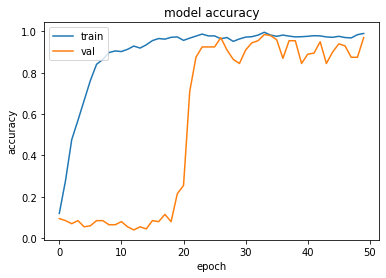

In [0]:
# Plot accuracy graph
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Google Drive export

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html

In [0]:
# Adjust the id to the folder of your choice in Google Drive
# Use `file = drive.CreateFile()` to write to root directory
# datasets/MS-Celeb-1A folder
file = drive.CreateFile({'parents':[{"id": "1ovVUyLeLL0-hu0MJcAN4kIEBP6T2HphD"}]})
file.SetContentFile('train_data.h5')
file.Upload()

FileNotFoundError: ignored

# Predict individual images

In [0]:
# Load images here
imgs = [1, 2, 3]
labels = [1,2,3]
# imgs = ...
# labels = ...

# Resize images

# Make them numpy
# imgs = np.asarray(imgs)
# labels = np.assarray(imgs)

# Prediction
#predictions = model.predict(imgs)
predictions = [1, 0, 3]

#
acc_array = np.intersect1d(labels, predictions)

SyntaxError: ignored

#Construct inference model

In [0]:
# Load weights if we haven't run the model yet
#model.load_weights('15id_model_weights.h5', by_name=True)
model = tf.keras.models.load_model('/content/drive/My Drive/Datasets/MS-Celeb-1M/15id_model.h5')

In [0]:
# Get final layer before classification layer
#global_average_pooling2d (Gl (None, 1024)              0         
#_________________________________________________________________
#reshape_1 (Reshape)          (None, 1, 1, 1024)        0         
#_________________________________________________________________
#dropout (Dropout)            (None, 1, 1, 1024)        0         
#_________________________________________________________________
#conv_preds (Conv2D)          (None, 1, 1, 15)          15375     
#_________________________________________________________________
#reshape_2 (Reshape)          (None, 15)                0         
#_________________________________________________________________
#act_softmax (Activation)     (None, 15)                0         

print("Final layer with embeddings :", model.get_layer('global_average_pooling2d_1').output)
print("Final layer with weights    :", model.get_layer('global_average_pooling2d_1').weights)

# This is the embedding layer - this should be the last layer before the lambda layer in our new model
print("\nFinal layers from old model:")
num_layers_to_remove = 6
for i, layer in enumerate(model.layers[-num_layers_to_remove - 5:]):
   print(i, layer.name)

# Create new inference only model
inference_model = tf.keras.models.Sequential()
for layer in model.layers[:-num_layers_to_remove + 1]:
  inference_model.add(layer)

# Set layers to untrainable
for layer in inference_model.layers:
  layer.trainable = False

# Now add lambda layer for embedding comparison
def comparison_function(x) :
  print(x)
  return x

inference_model.add(tf.keras.layers.Lambda(comparison_function))

# Show the new model
print("\nNew model for inference only:")
for i, layer in enumerate(inference_model.layers[-num_layers_to_remove - 5:]):
   print(i, " -", layer.name, ", trainable :", layer.trainable)


Final layer with embeddings : Tensor("global_average_pooling2d_1_1/Identity:0", shape=(None, 1024), dtype=float32)
Final layer with weights    : []

Final layers from old model:
0 conv_dw_13_bn
1 conv_dw_13_relu
2 conv_pw_13
3 conv_pw_13_bn
4 conv_pw_13_relu
5 global_average_pooling2d_1
6 reshape_1
7 dropout
8 conv_preds
9 reshape_2
10 act_softmax
Tensor("global_average_pooling2d_1_20/Identity:0", shape=(None, 1024), dtype=float32)

New model for inference only:
0  - conv_pw_12 , trainable : False
1  - conv_pw_12_bn , trainable : False
2  - conv_pw_12_relu , trainable : False
3  - conv_dw_13 , trainable : False
4  - conv_dw_13_bn , trainable : False
5  - conv_dw_13_relu , trainable : False
6  - conv_pw_13 , trainable : False
7  - conv_pw_13_bn , trainable : False
8  - conv_pw_13_relu , trainable : False
9  - global_average_pooling2d_1 , trainable : False
10  - lambda_2 , trainable : True


3
tf.Tensor(
[[[[1.         0.9843138  0.9803922 ]
   [0.9921569  0.9725491  0.9607844 ]
   [0.9921569  0.9490197  0.9333334 ]
   ...
   [0.95294124 0.9215687  0.83921576]
   [0.95294124 0.9333334  0.854902  ]
   [1.         1.         0.9294118 ]]

  [[0.97647065 0.9568628  0.9450981 ]
   [1.         0.9921569  0.9803922 ]
   [1.         0.9568628  0.9333334 ]
   ...
   [0.97647065 0.9333334  0.8470589 ]
   [0.96470594 0.93725497 0.86274517]
   [0.9725491  0.95294124 0.8745099 ]]

  [[0.9607844  0.9333334  0.909804  ]
   [1.         0.9921569  0.96470594]
   [0.9490197  0.8980393  0.86666673]
   ...
   [0.8980393  0.85098046 0.7490196 ]
   [0.97647065 0.9450981  0.854902  ]
   [0.98823535 0.96470594 0.87843144]]

  ...

  [[0.91372555 0.94117653 0.96470594]
   [0.91372555 0.94117653 0.96470594]
   [0.91372555 0.94117653 0.96470594]
   ...
   [0.8196079  0.85098046 0.86274517]
   [0.86666673 0.909804   0.92549026]
   [0.85098046 0.9058824  0.9176471 ]]

  [[0.9215687  0.94117653 0.9647

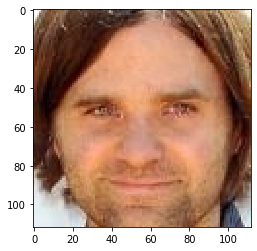

In [0]:
an_image = 0
for (img, label) in ds.take(1):
  #print(img[0].numpy())
  plt.imshow(img[0].numpy())
  an_image = img[0].numpy()
  a_label = label[0].numpy()
  print(label[0].numpy())

ti = tf.convert_to_tensor(an_image.reshape(1,112,112,3), dtype=tf.float32, name="img")
tl = tf.convert_to_tensor(a_label, dtype=tf.uint8, name="img")

print(ti)

In [0]:
preds = inference_model.predict(ti)
print(preds)
print(len(preds[0]))

embedding_1 = preds[0]

[[0.         0.0563849  0.06329335 ... 0.49298716 0.02239034 1.0414886 ]]
1024


In [0]:
cosine_loss = tf.keras.losses.CosineSimilarity(axis=1)
loss = cosine_loss([[0., 1.], [1., 1.]], [[1., 0.], [1., 1.]])
# l2_norm(y_true) = [[0., 1.], [1./1.414], 1./1.414]]]
# l2_norm(y_pred) = [[1., 0.], [1./1.414], 1./1.414]]]
# l2_norm(y_true) . l2_norm(y_pred) = [[0., 0.], [0.5, 0.5]]
# loss = mean(sum(l2_norm(y_true) . l2_norm(y_pred), axis=1))
#       = ((0. + 0.) +  (0.5 + 0.5)) / 2

print('Loss: ', loss.numpy())  # Loss: 0.5

Loss:  -0.49999997
